In [182]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
import seaborn as sns
from scipy import stats


In [84]:
data = np.loadtxt('/content/features.csv',delimiter=',', skiprows=1) # skip row for column names

In [6]:
np.shape(data)

(124, 15)

In [85]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

## **Exploratory Data Analysis**

In [12]:
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]
x_test = data[test_ind,1:11]
y_test = data[test_ind,0]
x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]


Text(0.5, 1.0, 'Boxplot of y_train')

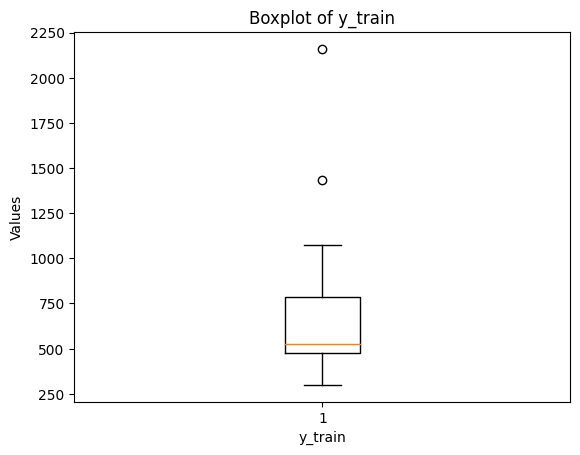

In [15]:
# Create the boxplot
plt.boxplot(y_train)
# Add labels and title
plt.xlabel('y_train')
plt.ylabel('Values')
plt.title('Boxplot of y_train')

Text(0.5, 1.0, 'Boxplot of y_test')

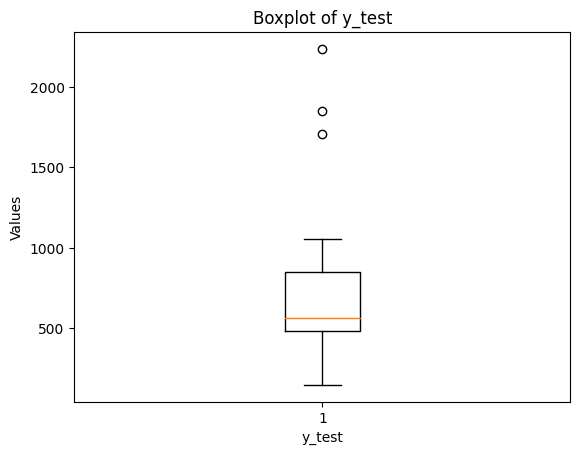

In [16]:
plt.boxplot(y_test)
# Add labels and title
plt.xlabel('y_test')
plt.ylabel('Values')
plt.title('Boxplot of y_test')

Text(0.5, 1.0, 'Boxplot of y_stest')

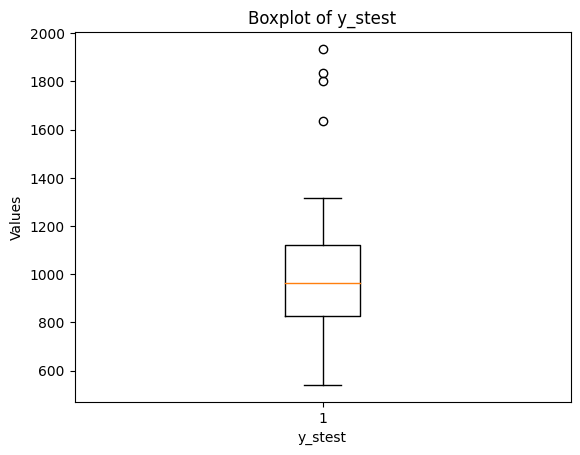

In [17]:
plt.boxplot(y_stest)
# Add labels and title
plt.xlabel('y_stest')
plt.ylabel('Values')
plt.title('Boxplot of y_stest')

In [22]:
data.shape

(124, 15)

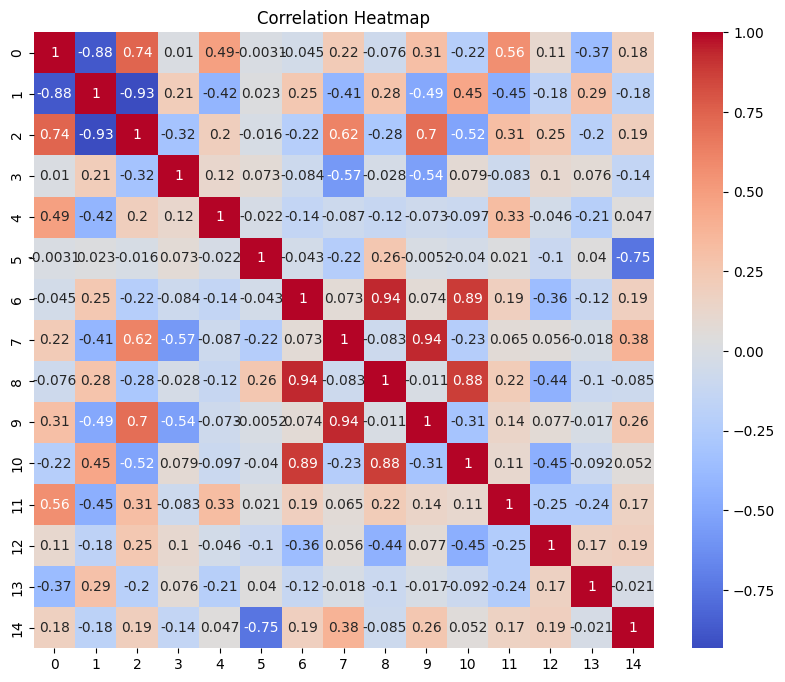

In [21]:
correlation_matrix = np.corrcoef(data, rowvar=False)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

## **Discharge Model**

In [ ]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]

regressor = ElasticNet()

In [ ]:
# Create the random grid
param_grid = { 'l1_ratio': np.linspace(0,1,10000),
              }
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(l1_ratio=0.0037003700370037006),
                   n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)
Fitting 4 folds for each of 10000 candidates, totalling 40

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10000 is smaller than n_iter=20000. Running 10000 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.828e-01, tolerance: 1.070e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(l1_ratio=0.0037003700370037006),
                   n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"])

In [ ]:
regressor.fit(x_train,y_train)

ElasticNet(l1_ratio=1.0)

### **Metric Evaluation**

In [ ]:
np.sqrt(np.mean((regressor.predict(x_test)-y_test)**2))

162.76587705783226

In [ ]:
np.sqrt(np.mean((regressor.predict(x_stest)-y_stest)**2))

197.39365048416727

In [ ]:
np.mean((np.abs(regressor.predict(x_train)-y_train))/y_train)

0.21006002955255068

In [ ]:
np.mean((np.abs(regressor.predict(x_test)-y_test))/y_test)

0.20599888060138916

In [ ]:
np.mean((np.abs(regressor.predict(x_stest)-y_stest))/y_stest)

0.12831217801626765

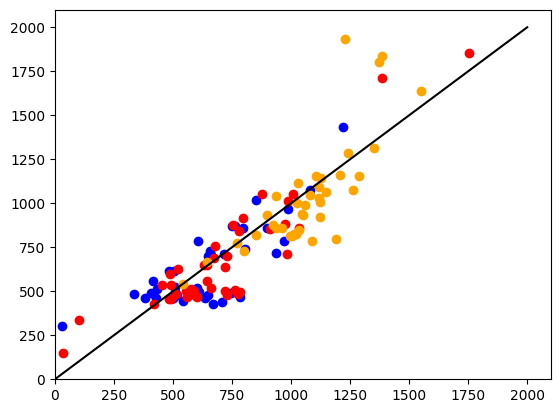

In [ ]:
fig,ax=plt.subplots()
ax.scatter(regressor.predict(x_train),y_train,c="blue")
ax.scatter(regressor.predict(x_test),y_test,c="red")
ax.scatter(regressor.predict(x_stest),y_stest,c="orange")
ax.set_xlim([0,2100])
ax.set_ylim([0,2100])
ax.plot(np.linspace(0,2000),np.linspace(0,2000),color='black')

## **Improvement Discharge Model**

In [32]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [33]:
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-6, 0, 10000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-0.01, 0, 100000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring=my_scorer,
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)
print(model)
model.fit(x_train, (y_train))

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-06, 1.00138264e-06, 1.00276720e-06, ...,
       9.97240436e-01, 9.98619265e-01, 1.00000000e+00]),
                                        'l1_ratio': array([0.97723722, 0.97723745, 0.97723767, ..., 0.99999954, 0.99999977,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring=ma

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-06, 1.00138264e-06, 1.00276720e-06, ...,
       9.97240436e-01, 9.98619265e-01, 1.00000000e+00]),
                                        'l1_ratio': array([0.97723722, 0.97723745, 0.97723767, ..., 0.99999954, 0.99999977,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [34]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])

In [35]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=9.554281212853748e-05, l1_ratio=0.999988256767545)

In [36]:
print("RMSE on Train Data: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2) ))

RMSE on Train Data:  95.06091830480301


In [37]:
print("RMSE on Primary Test: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2) ))
# 1 is the best score

RMSE on Primary Test:  121.93710996333732


In [38]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2) ))
# 1 is the best score

RMSE on Secondary Test:  255.47837233800456


In [39]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train)-10**y_train)/10**y_train)))

MPE on Train Data:  0.1263815696167534


In [40]:
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test)-10**y_test)/10**y_test)))

MPE on Primary Test:  0.16025788101593694


In [41]:
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest)-10**y_stest)/10**y_stest)))

MPE on Secondary Test:  0.15612348724846464


In [42]:
regressor.coef_

array([-0.39240253, -0.42286324, -0.04630942,  0.0245027 , -0.        ,
        3.80402771, -0.        ,  0.        , -0.        ,  0.        ])

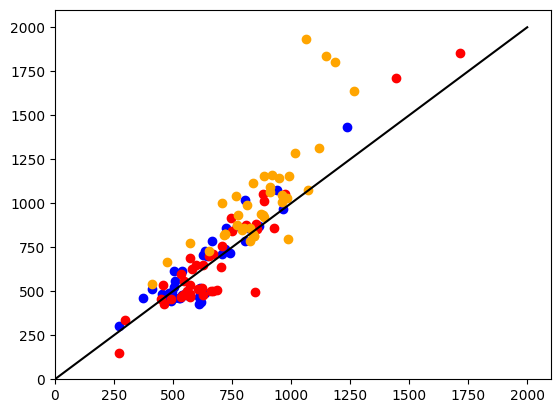

In [47]:
fig,ax=plt.subplots()
ax.scatter(10**(regressor.predict(x_train)),10**(y_train),c="blue")
ax.scatter(10**(regressor.predict(x_test)),10**(y_test),c="red")
ax.scatter(10**(regressor.predict(x_stest)),10**(y_stest),c="orange")
ax.set_xlim([0,2100])
ax.set_ylim([0,2100])
ax.plot(np.linspace(0,2000),np.linspace(0,2000),color='black')

## **Full Model**

In [48]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [56]:
regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-3, 1, 1000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-0.25, 0, 10000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring=my_scorer,
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)

model.fit(x_train, y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
Fitting 4 folds for each of 20000 candidates, totalling 80000 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-03, 1.00926219e-03, 1.01861017e-03, 1.02804473e-03,
       1.03756668e-03, 1.04717682e-03, 1.05687597e-03, 1.06666496e-03,
       1.07654461e-03, 1.08651577e-03, 1.09657929e-03, 1.10673602e-03,
       1.11698682e-03, 1.12...
       9.03557835e+00, 9.11926760e+00, 9.20373200e+00, 9.28897872e+00,
       9.37501502e+00, 9.46184819e+00, 9.54948564e+00, 9.63793480e+00,
       9.72720319e+00, 9.81729841e+00, 9.90822810e+00, 1.00000000e+01]),
                                        'l1_ratio': array([0.56234133, 0.5623737 , 0.56240608, ..., 0.99988487, 0.99994243,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [57]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])

In [58]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=0.001978318882784164, l1_ratio=0.9983893277648741)

In [59]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2) ))

RMSE on Train Data:  111.82282429504086


In [60]:
print("RMSE on Primary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2) ))


RMSE on Primary Test:  130.0342894627757


In [61]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2) ))

RMSE on Secondary Test:  308.6226207206349


In [62]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train)-10**y_train)/10**y_train)))
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test)-10**y_test)/10**y_test)))
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest)-10**y_stest)/10**y_stest)))

MPE on Train Data:  0.14047657378780995
MPE on Primary Test:  0.16021386785655847
MPE on Secondary Test:  0.19253219442216013


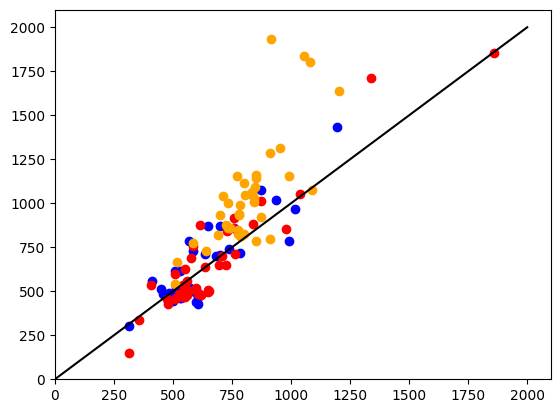

In [63]:
fig,ax=plt.subplots()
ax.scatter(10**(regressor.predict(x_train)),10**(y_train),c="blue")
ax.scatter(10**(regressor.predict(x_test)),10**(y_test),c="red")
ax.scatter(10**(regressor.predict(x_stest)),10**(y_stest),c="orange")
ax.set_xlim([0,2100])
ax.set_ylim([0,2100])
ax.plot(np.linspace(0,2000),np.linspace(0,2000),color='black')

## **Variance Model**

In [65]:
data = np.loadtxt('/content/vardQ_.6f.csv',delimiter=',') # skip row for column names

In [66]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [67]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = SVR()
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [68]:
regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-7, 0, 1000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-7, 0, 10000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring=my_scorer,
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)

model.fit(x_train.reshape(-1, 1), y_train)

[3.334454 3.156549 3.031004 2.939519 2.896526 2.856729 2.932981 2.896526
 2.747412 3.007321 2.939519 2.934498 2.850646 2.863917 2.870404 2.847573
 2.790285 2.984977 2.846337 2.789581 2.477121 2.641474 2.647383 2.708421
 2.678518 2.683947 2.693727 2.663701 2.689309 2.721811 2.663701 2.670246
 2.697229 2.691965 2.716003 2.665581 2.679428 2.661813 2.632457 2.664642
 2.687529]
Fitting 4 folds for each of 20000 candidates, totalling 80000 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-07, 1.01626509e-07, 1.03279473e-07, 1.04959323e-07,
       1.06666496e-07, 1.08401436e-07, 1.10164595e-07, 1.11956432e-07,
       1.13777413e-07, 1.15628013e-07, 1.17508713e-07, 1.19420003e-07,
       1.21362380e-07, 1.23...
       8.37380654e-01, 8.51000725e-01, 8.64842328e-01, 8.78909065e-01,
       8.93204600e-01, 9.07732653e-01, 9.22497005e-01, 9.37501502e-01,
       9.52750047e-01, 9.68246612e-01, 9.83995230e-01, 1.00000000e+00]),
                                        'l1_ratio': array([1.00000000e-07, 1.00161327e-07, 1.00322914e-07, ...,
       9.96781250e-01, 9.98389328e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

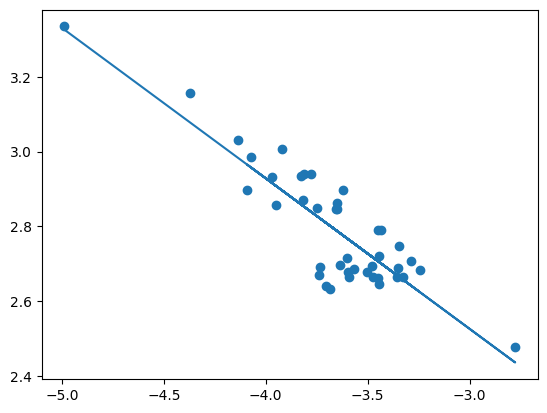

In [69]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [70]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -122.72639035379655
Best hyperparameters:  {'l1_ratio': 1.0614574517283599e-07, 'alpha': 1e-07}


In [71]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])
regressor.fit(x_train.reshape(-1,1),y_train)

ElasticNet(alpha=1e-07, l1_ratio=1.0614574517283599e-07)

In [72]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train.reshape(-1,1)))-
                                               np.power(10,y_train))**2) ))

RMSE on Train Data:  116.53949370982102


In [73]:
print("RMSE on Primary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_test.reshape(-1,1)))-np.power(10,y_test))**2) ))

RMSE on Primary Test:  137.59110258821548


In [74]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest.reshape(-1,1)))-np.power(10,y_stest))**2) ))

RMSE on Secondary Test:  212.66469540987137


In [75]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train.reshape(-1,1))-10**y_train)/10**y_train)))
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test.reshape(-1,1))-10**y_test)/10**y_test)))
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest.reshape(-1,1))-10**y_stest)/10**y_stest)))

MPE on Train Data:  0.15783086062145
MPE on Primary Test:  0.1662940377224816
MPE on Secondary Test:  0.12478569537147885


ValueError: ignored

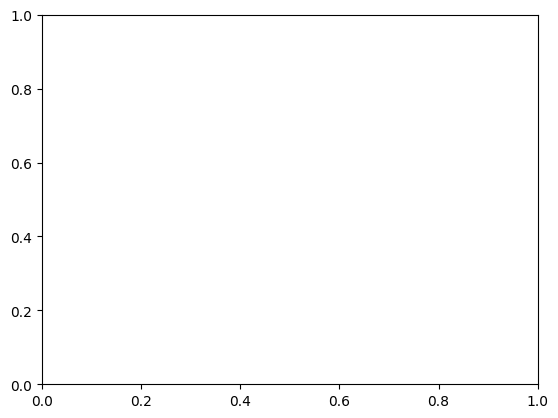

In [76]:
fig,ax=plt.subplots()
ax.scatter(10**(regressor.predict(x_train)),10**(y_train),c="blue")
ax.scatter(10**(regressor.predict(x_test)),10**(y_test),c="red")
ax.scatter(10**(regressor.predict(x_stest)),10**(y_stest),c="orange")
ax.set_xlim([0,2100])
ax.set_ylim([0,2100])
ax.plot(np.linspace(0,2000),np.linspace(0,2000),color='black')

## **Hybrid Model**

In [207]:
def boxcox_transform(y, lambda_value=-0.737):
    if lambda_value == 0:
        return np.log(y)
    else:
        return (np.power(y, lambda_value) - 1) / lambda_value

def boxcox_inverse(y_transformed, lambda_value=-0.737):
    if lambda_value == 0:
        return np.exp(y_transformed)
    else:
        return np.power((y_transformed * lambda_value) + 1, 1 / lambda_value)

In [208]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"

selected_indices = [1, 2, 4, 11]  #based on corr matrix
# Select the desired columns from the dataset
x_train = data[train_ind][:, selected_indices]
y_train = data[train_ind,0]
# y_train = np.log10(y_train) #tried with np.log10 as well
y_train = boxcox_transform(y_train)

x_test = data[test_ind][:, selected_indices]
y_test = data[test_ind,0]
# y_test = np.log10(y_test)
y_test = boxcox_transform(y_test)

x_stest = data[secondary_ind][:, selected_indices]
y_stest = data[secondary_ind,0]
# y_stest = np.log10(y_stest)
y_stest =boxcox_transform(y_stest)

print(y_train)

[1.35212015 1.35045246 1.34893288 1.34760285 1.3469028  1.34620765
 1.34749965 1.3469028  1.34403795 1.34860812 1.34760285 1.3475237
 1.34609721 1.34633671 1.34645183 1.34604096 1.34493715 1.34828953
 1.34601827 1.3449229  1.33658022 1.3415142  1.34166723 1.34316138
 1.34244872 1.34258081 1.3428157  1.34208195 1.34271007 1.34346896
 1.34208195 1.34224509 1.34289888 1.34277367 1.34333642 1.342129
 1.34247094 1.34203455 1.3412777  1.34210552 1.34266729]


In [174]:
dataset = y_train
mean = np.mean(dataset, axis=0)
std = np.std(dataset, axis=0)
min_val = np.min(dataset, axis=0)
max_val = np.max(dataset, axis=0)

# Print the descriptive statistics
print("Mean:", mean)
print("Standard Deviation:", std)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)

Mean: 2.793969897643637
Standard Deviation: 0.16157397476043683
Minimum Value: 2.4771212547196626
Maximum Value: 3.3344537511509307


<ipython-input-209-caf5a2df2083>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


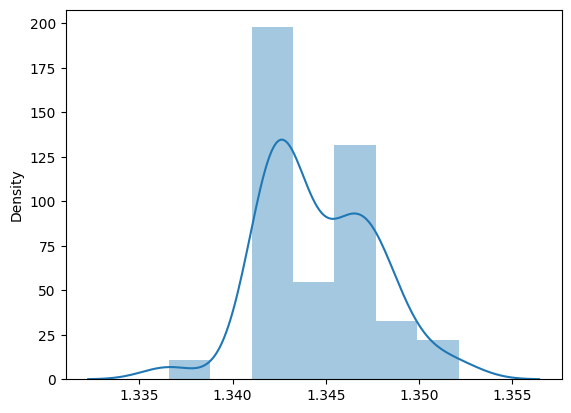

In [209]:
sns.distplot(y_train)
plt.show()

In [210]:
regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-5, 1, 1000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-3, 0, 10000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring=my_scorer,
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)

model.fit(x_train, y_train)

[1.35212015 1.35045246 1.34893288 1.34760285 1.3469028  1.34620765
 1.34749965 1.3469028  1.34403795 1.34860812 1.34760285 1.3475237
 1.34609721 1.34633671 1.34645183 1.34604096 1.34493715 1.34828953
 1.34601827 1.3449229  1.33658022 1.3415142  1.34166723 1.34316138
 1.34244872 1.34258081 1.3428157  1.34208195 1.34271007 1.34346896
 1.34208195 1.34224509 1.34289888 1.34277367 1.34333642 1.342129
 1.34247094 1.34203455 1.3412777  1.34210552 1.34266729]
Fitting 4 folds for each of 20000 candidates, totalling 80000 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-05, 1.01392541e-05, 1.02804473e-05, 1.04236067e-05,
       1.05687597e-05, 1.07159340e-05, 1.08651577e-05, 1.10164595e-05,
       1.11698682e-05, 1.13254132e-05, 1.14831241e-05, 1.16430313e-05,
       1.18051653e-05, 1.19...
       8.58882856e+00, 8.70843150e+00, 8.82969996e+00, 8.95265713e+00,
       9.07732653e+00, 9.20373200e+00, 9.33189772e+00, 9.46184819e+00,
       9.59360829e+00, 9.72720319e+00, 9.86265846e+00, 1.00000000e+01]),
                                        'l1_ratio': array([0.001     , 0.00100069, 0.00100138, ..., 0.99861926, 0.99930939,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [211]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])

In [212]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.001025890740828289)

### **With log**

In [167]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2) ))
print("RMSE on Primary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2) ))
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2) ))

RMSE on Train Data:  104.60949839293629
RMSE on Primary Test:  140.54017636751212
RMSE on Secondary Test:  304.14368410497997


In [168]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train)-10**y_train)/10**y_train)))
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test)-10**y_test)/10**y_test)))
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest)-10**y_stest)/10**y_stest)))

MPE on Train Data:  0.1370640055325333
MPE on Primary Test:  0.14956302971511848
MPE on Secondary Test:  0.18470298816516134


### **With Inverse BoxCox**

In [190]:
y_pred_transformed = regressor.predict(x_train)  # Replace this with your transformed y_pred
y_train_transformed = y_train  # Replace this with your transformed y_train
y_pred = inv_boxcox(y_pred_transformed, lambda_value)
y_train = inv_boxcox(y_train_transformed, lambda_value)
print("RMSE on Train Data: ", np.sqrt(np.mean((y_pred - y_train) ** 2)))

# y_pred_transformed = regressor.predict(x_test)  # Replace this with your transformed y_pred
# y_test_transformed = y_test  # Replace this with your transformed y_train
# y_pred = stats.boxcox(y_pred_transformed, lambda_value, inverse=True)
# y_test = stats.boxcox(y_train_transformed, lambda_value, inverse=True)
# print("RMSE on Test Data: ", np.sqrt(np.mean((regressor.predict(x_test)- y_test) ** 2)))


# print("RMSE on secondary Test Data: ", np.sqrt(np.mean((regressor.predict(x_stest)- y_stest) ** 2)))

RMSE on Train Data:  0.026634725005572787


### **Without log**

In [142]:
print("RMSE on Train Data: ", np.sqrt(np.mean((regressor.predict(x_train)- y_train) ** 2)))
print("RMSE on Test Data: ", np.sqrt(np.mean((regressor.predict(x_test)- y_test) ** 2)))
print("RMSE on secondary Test Data: ", np.sqrt(np.mean((regressor.predict(x_stest)- y_stest) ** 2)))

RMSE on Train Data:  140.3069734194099
RMSE on Test Data:  154.58475449604995
RMSE on secondary Test Data:  311.63672059338757
